<a href="https://colab.research.google.com/github/Rochy3/AlgorithmsUN2024II/blob/main/LAB_ATQ/RosaSantofimio_LAB_ATQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#   Q18 Machine Learning Rolling Basis
## Presentado Por Rosa Santofimio
In this example we predict whether the price will rise or fall by using supervised learning (Bayesian Ridge Regression). This template represents a starting point for developing a system which can take part to the **Q18 NASDAQ-100 Stock Long-Short contest**.

It consists of two parts.

* In the **first part** we just perform a global training of the time series using all time series data. We disregard the sequential aspect of the data and use also future data to train past data.

* In the **second part** we use the built-in backtester and perform training and prediction on a rolling basis in order to avoid forward looking. Please note that we are using a **specialized** version of the Quantiacs backtester which dramatically speeds up the the backtesting process by retraining your model on a regular basis.

**Features for learning**: we will use several technical indicators trying to capture different features. You can have a look at [**Technical Indicators**](https://quantiacs.com/documentation/en/user_guide/technical_indicators.html).

Please note that:

* Your trading algorithm can open short and long positions.

* At each point in time your algorithm can trade all or a subset of the stocks which at that point of time are or were part of the NASDAQ-100 stock index. Note that the composition of this set changes in time, and Quantiacs provides you with an appropriate filter function for selecting them.

* The Sharpe ratio of your system since January 1st, 2006, has to be larger than 1.

* Your system cannot be a copy of the current examples. We run a correlation filter on the submissions and detect duplicates.

* For simplicity we will use a single asset. It pays off to use more assets, ideally uncorrelated, and diversify your positions for a more solid Sharpe ratio.

More details on the rules can be found [here](https://quantiacs.com/contest).

**Need help?** Check the [**Documentation**](https://quantiacs.com/documentation/en/) and find solutions/report problems in the [**Forum**](https://quantiacs.com/community/categories) section.

**More help with Jupyter?** Check the official [**Jupyter**](https://jupyter.org/) page.

Once you are done, click on **Submit to the contest** and take part to our competitions.

API reference:

* **data**: check how to work with [data](https://quantiacs.com/documentation/en/reference/data_load_functions.html);

* **backtesting**: read how to run the [simulation](https://quantiacs.com/documentation/en/reference/evaluation.html) and check the results.

Need to use the optimizer function to automate tedious tasks?

* **optimization**: read more on our [article](https://quantiacs.com/community/topic/29/optimizing-and-monitoring-a-trading-system-with-quantiacs).

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) { return false; }
// disable widget scrolling

<IPython.core.display.Javascript object>

In [4]:
! pip install git+https://github.com/quantiacs/toolbox.git

  Cloning https://github.com/quantiacs/toolbox.git to /tmp/pip-req-build-8crpl7q9
  Running command git clone --filter=blob:none --quiet https://github.com/quantiacs/toolbox.git /tmp/pip-req-build-8crpl7q9
  Resolved https://github.com/quantiacs/toolbox.git to commit a1e6351446cd936532af185fb519ef92f5b1ac6d
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 15.7 MB/s eta 0:00:00
  Created wheel for qnt: 

In [5]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4111    0  4111    0     0  24776      0 --:--:-- --:--:-- --:--:-- 24915
100  517k  100  517k    0     0   978k      0 --:--:-- --:--:-- --:--:--  978k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4107    0  4107    0     0  20035      0 --:--:-- --:--:-- --:--:-- 20132
100  392k  100  392k    0     0   732k      0 --:--:-- --:--:-- --:--:--  732k


In [6]:
import os

os.environ['API_KEY'] = 'f0d3c2f6-f4ed-4bcb-a1b6-444cc7b54f16'
os.environ['DATA_BASE_URL'] = 'https://data-api.quantiacs.io/'
os.environ['CACHE_RETENTION'] = '7'
os.environ['CACHE_DIR'] = 'data-cache'


In [7]:
import logging

import xarray as xr  # xarray for data manipulation

import qnt.data as qndata     # functions for loading data
import qnt.backtester as qnbt # built-in backtester
import qnt.ta as qnta         # technical analysis library
import qnt.stats as qnstats   # statistical functions

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

np.seterr(divide = "ignore")

from qnt.ta.macd import macd
from qnt.ta.rsi  import rsi
from qnt.ta.stochastic import stochastic_k, stochastic, slow_stochastic

# Cambio el modelo lineal (Linear Regression) por Random Forest. Esto se debe a que Random Forest puede manejar relaciones no lineales y características interdependientes de manera más eficiente.
# Esto es ideal para datos financieros, donde las relaciones entre variables suelen ser complejas y no lineales.
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error


In [8]:
# Cargar todos los activos del spx
""# Cargar todos los activos del SPX
"""
Carga los datos históricos de los últimos 5 años de los activos especificados.

Parámetros:
    tail (int): Número de días de datos históricos a cargar.
    assets (list): Lista de activos a cargar.

Retorna:
    DataFrame: Un DataFrame con los datos históricos de los activos especificados.
"""
stock_data = qndata.stocks.load_spx_data(tail=365 * 5, assets=[
    "NAS:AAPL",  # Apple Inc.: Líder en productos electrónicos y servicios digitales.
    "NAS:MSFT",  # Microsoft Corp.: Desarrollador de software y servicios en la nube.
    "NAS:GOOGL", # Alphabet Inc. (Google): Dominante en búsquedas y publicidad online.
    "NAS:NVDA",  # NVIDIA: Fabricante de GPUs y líder en inteligencia artificial.
    "NAS:META",  # Meta Platforms: Dueña de Facebook, Instagram, y en desarrollo del metaverso.
    "NAS:TSLA",  # Tesla Inc.: Innovador en vehículos eléctricos y energía renovable.
    "NAS:AMZN",  # Amazon: Gigante del comercio electrónico y servicios en la nube.
    "NAS:INTC",  # Intel Corp.: Líder en la fabricación de microprocesadores.
    "NAS:CSCO",  # Cisco Systems: Proveedor de equipos de redes y ciberseguridad.
    "NAS:PEP",   # PepsiCo Inc.: Multinacional de alimentos y bebidas.
    "NAS:ADBE",  # Adobe Inc.: Software para diseño y multimedia.
    "NAS:CMCSA", # Comcast: Proveedor de telecomunicaciones y servicios de medios.
    "NAS:AVGO",  # Broadcom: Fabricante de semiconductores para diversas industrias.
    "NAS:COST",  # Costco: Minorista de productos a granel a precios competitivos.
    "NAS:TXN",   # Texas Instruments: Productor de semiconductores y tecnología analógica.
    "NAS:QCOM",  # Qualcomm: Líder en semiconductores y tecnología móvil.
    "NAS:AMD",   # AMD: Competencia de Intel y NVIDIA en semiconductores y GPUs.
    "NAS:AMGN",  # Amgen: Empresa de biotecnología enfocada en terapias innovadoras.
    "NAS:INTU",  # Intuit: Software financiero, conocido por TurboTax y QuickBooks.
    "NAS:BKNG"   # Booking Holdings: Plataforma de reservas de viajes en línea.
])

# Filtrar solo los activos líquidos
is_liquid = stock_data.sel(field="is_liquid")
stock_data = stock_data.where(is_liquid)

# Asignar valores individuales de campos
open_ = stock_data.sel(field="open")
close = stock_data.sel(field="close")
high = stock_data.sel(field="high")
low = stock_data.sel(field="low")


| |#                                              | 15975 Elapsed Time: 0:00:00
| |#                                              | 15975 Elapsed Time: 0:00:00
| |     #                                        | 494459 Elapsed Time: 0:00:00


fetched chunk 1/1 5s
Data loaded 6s


In [9]:
def get_features(data):
    """Builds the features used for learning:
       * a trend indicator;
       * the moving average convergence divergence (MACD);
       * a volatility measure;
       * the stochastic oscillator;
       * the relative strength index (RSI);
       * the logarithm of the closing price.
    Nuevos Cambios:
       * On-Balance Volume (OBV): Relaciona el volumen de operaciones con el movimiento del precio.
       * Average True Range (ATR): Mide la volatilidad del precio, reflejando el nivel de riesgo.
       * Bollinger Bands Width: Captura la volatilidad mediante la diferencia entre las bandas superior e inferior.
       * Williams %R: Identifica niveles de sobrecompra o sobreventa.
    """

    # Trend indicator:
    trend = qnta.roc(qnta.lwma(data.sel(field="close"), 60), 1)
    trend = trend.expand_dims(field=["trend"])

    # Moving Average Convergence Divergence (MACD):
    macd2_line, macd2_signal, macd2_hist = qnta.macd(data, 12, 26, 9)
    macd2_signal = macd2_signal.sel(field="close").expand_dims(field=["macd"])

    # Volatility:
    volatility = qnta.tr(data.sel(field="high"), data.sel(field="low"), data.sel(field="close"))
    volatility = volatility / data.sel(field="close")
    volatility = qnta.lwma(volatility, 14).expand_dims(field=["volatility"])

    # Stochastic Oscillator:
    k, d = qnta.stochastic(data.sel(field="high"), data.sel(field="low"), data.sel(field="close"), 14)
    d = d.expand_dims(field=["stochastic_d"])

    # Relative Strength Index (RSI):
    rsi = qnta.rsi(data.sel(field="close")).expand_dims(field=["rsi"])

    # Logarithm of the closing price:
    price = data.sel(field="close").ffill("time").bfill("time").fillna(0)  # Fill NaN values
    price = np.log(price).expand_dims(field=["price"])

    # On-Balance Volume (OBV):
    obv = qnta.obv(data.sel(field="close"), data.sel(field="vol")).expand_dims(field=["obv"])

    # Average True Range (ATR):
    atr = qnta.atr(data.sel(field="high"), data.sel(field="low"), data.sel(field="close"), 14).expand_dims(field=["atr"])

    # Combine all features:
    result = xr.concat(
        [trend, macd2_signal, volatility, d, rsi, price, obv, atr],
        dim="field"
    )

    return result.transpose("time", "field", "asset")


In [10]:
# displaying the features:
my_features = get_features(stock_data)
display(my_features.sel(field="trend").to_pandas())

asset,NAS:AAPL,NAS:ADBE,NAS:AMD,NAS:AMGN,NAS:AMZN,NAS:AVGO,NAS:BKNG,NAS:CMCSA,NAS:COST,NAS:CSCO,NAS:GOOGL,NAS:INTC,NAS:INTU,NAS:META,NAS:MSFT,NAS:NVDA,NAS:PEP,NAS:QCOM,NAS:TSLA,NAS:TXN
time,,,,,,,,,,,,,,,,,,,,
2020-02-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-03,-0.132496,-0.253000,-0.409331,0.116833,0.264191,0.231572,-0.198295,-0.569795,0.199602,0.112321,0.270745,-0.367683,-0.207823,0.493623,-0.140446,-0.525231,-0.114393,0.171410,0.009462,-0.247596
2025-02-04,-0.068328,-0.236719,-0.261319,0.124110,0.320909,0.289791,-0.207059,-0.528595,0.247531,0.123934,0.349204,-0.375015,-0.253918,0.514683,-0.129920,-0.472119,-0.254984,0.225906,0.059728,-0.248233
2025-02-05,-0.075044,-0.250533,-0.450467,0.355383,0.224170,0.421227,-0.191215,-0.484578,0.311586,0.186684,0.080305,-0.308403,-0.270329,0.504089,-0.123194,-0.315743,-0.199932,0.279771,-0.073453,-0.224849


In [11]:
def get_target_classes(data):
    """ Target classes for predicting if price goes up or down."""

    price_current = data.sel(field="close")
    price_future  = qnta.shift(price_current, -1)

    class_positive = 1 # prices goes up more than 0.1%
    class_neutral = 0 # prices goes up or down las that 0.1%
    class_negative = -1 #price goes down more than 0.1%

    target_price_up = xr.where(price_future > price_current, class_positive, class_negative)

    return target_price_up

In [12]:
# displaying the target classes:
my_targetclass = get_target_classes(stock_data)
display(my_targetclass.to_pandas())

asset,NAS:AAPL,NAS:ADBE,NAS:AMD,NAS:AMGN,NAS:AMZN,NAS:AVGO,NAS:BKNG,NAS:CMCSA,NAS:COST,NAS:CSCO,NAS:GOOGL,NAS:INTC,NAS:INTU,NAS:META,NAS:MSFT,NAS:NVDA,NAS:PEP,NAS:QCOM,NAS:TSLA,NAS:TXN
time,,,,,,,,,,,,,,,,,,,,
2020-02-13,1,1,1,1,-1,-1,1,1,1,-1,1,-1,1,1,1,1,1,-1,-1,-1
2020-02-14,-1,-1,1,-1,1,-1,-1,1,1,-1,1,-1,-1,1,1,1,-1,-1,1,-1
2020-02-18,1,1,1,1,1,1,-1,-1,1,-1,1,1,1,-1,1,1,-1,1,1,1
2020-02-19,-1,-1,-1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2020-02-20,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-03,1,1,1,1,1,1,-1,1,1,1,1,-1,-1,1,1,1,-1,1,1,-1
2025-02-04,-1,-1,-1,1,-1,1,1,1,1,1,-1,1,-1,1,1,1,1,1,-1,1
2025-02-05,1,-1,-1,-1,1,-1,1,1,1,-1,1,-1,1,1,1,1,-1,-1,-1,1


In [13]:
def get_model():
    """This is a constructor for the ML model (Gradient Boosting Regressor),
       which is more robust for non-linear relationships compared to Bayesian Ridge.

       Rationale:
       Gradient Boosting is chosen because:
       1. It can handle non-linear relationships in data, which are common in financial time series.
       2. It is robust to overfitting when tuned properly and works well with a mix of features.
       3. It uses an ensemble approach, combining weak learners (decision trees) to improve accuracy.
    """

    model = GradientBoostingRegressor(
        n_estimators=100,  # Number of boosting stages
        learning_rate=0.1,  # Shrinks the contribution of each tree
        max_depth=3,  # Depth of the individual regression estimators
        random_state=42  # Ensures reproducibility
    )
    return model


In [14]:
# Create and train the models working on an asset-by-asset basis.

asset_name_all = stock_data.coords["asset"].values

models = dict()

for asset_name in asset_name_all:

        # drop missing values:
        target_cur   = my_targetclass.sel(asset=asset_name).dropna("time", how="any")
        features_cur = my_features.sel(asset=asset_name).dropna("time", how="any")

        # align features and targets:
        target_for_learn_df, feature_for_learn_df = xr.align(target_cur, features_cur, join="inner")

        if len(features_cur.time) < 10:
            # not enough points for training
                continue

        model = get_model()

        try:
            model.fit(feature_for_learn_df.values, target_for_learn_df)
            models[asset_name] = model

        except:
            logging.exception("model training failed")

print(models)

{'NAS:AAPL': GradientBoostingRegressor(random_state=42), 'NAS:ADBE': GradientBoostingRegressor(random_state=42), 'NAS:AMD': GradientBoostingRegressor(random_state=42), 'NAS:AMGN': GradientBoostingRegressor(random_state=42), 'NAS:AMZN': GradientBoostingRegressor(random_state=42), 'NAS:AVGO': GradientBoostingRegressor(random_state=42), 'NAS:BKNG': GradientBoostingRegressor(random_state=42), 'NAS:CMCSA': GradientBoostingRegressor(random_state=42), 'NAS:COST': GradientBoostingRegressor(random_state=42), 'NAS:CSCO': GradientBoostingRegressor(random_state=42), 'NAS:GOOGL': GradientBoostingRegressor(random_state=42), 'NAS:INTC': GradientBoostingRegressor(random_state=42), 'NAS:INTU': GradientBoostingRegressor(random_state=42), 'NAS:META': GradientBoostingRegressor(random_state=42), 'NAS:MSFT': GradientBoostingRegressor(random_state=42), 'NAS:NVDA': GradientBoostingRegressor(random_state=42), 'NAS:PEP': GradientBoostingRegressor(random_state=42), 'NAS:QCOM': GradientBoostingRegressor(random_st

Feature: 0, Score: 0.11990
Feature: 1, Score: 0.10502
Feature: 2, Score: 0.09219
Feature: 3, Score: 0.07966
Feature: 4, Score: 0.12983
Feature: 5, Score: 0.14604
Feature: 6, Score: 0.16274
Feature: 7, Score: 0.16463


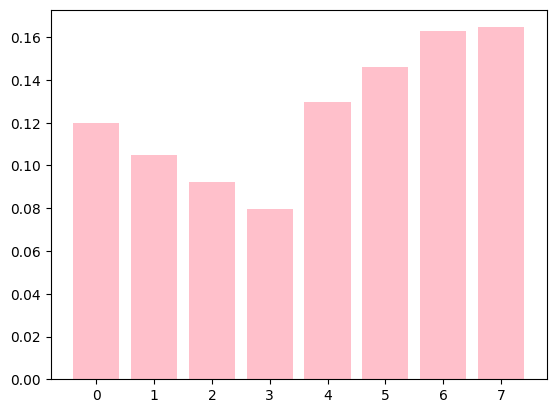

In [15]:
# Showing which features are more important in predicting:

importance = models["NAS:AAPL"].feature_importances_ # Use feature_importances_ instead of coef_
importance

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance, color = 'pink')
plt.show()

In [16]:
# Performs prediction and generates output weights:

asset_name_all = stock_data.coords["asset"].values
weights = xr.zeros_like(stock_data.sel(field="close"))

for asset_name in asset_name_all:
    if asset_name in models:
        model = models[asset_name]
        features_all = my_features
        features_cur = features_all.sel(asset=asset_name).dropna("time", how="any")
        if len(features_cur.time) < 1:
            continue
        try:
            weights.loc[dict(asset=asset_name, time=features_cur.time.values)] = model.predict(features_cur.values)
        except KeyboardInterrupt as e:
            raise e
        except:
            logging.exception("model prediction failed")

print(weights)

<xarray.DataArray 'stocks_s&p500' (time: 1254, asset: 20)> Size: 201kB
array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.4355687 ,  0.04414722, -0.30918837, ..., -0.10416079,
        -0.29786462,  0.10000248],
       [-0.45529156, -0.11980478, -0.32408747, ..., -0.28559922,
        -0.60476457, -0.34591555],
       [-0.34191906, -0.19166733, -0.19860472, ..., -0.12667809,
        -0.71925726, -0.04405016]])
Coordinates:
  * asset    (asset) <U9 720B 'NAS:AAPL' 'NAS:ADBE' ... 'NAS:TSLA' 'NAS:TXN'
  * time     (time) datetime64[ns] 10kB 2020-02-13 2020-02-14 ... 2025-02-07
    field    <U5 20B 'close'


In [17]:
def get_sharpe(stock_data, weights):
    """Calculates the Sharpe ratio"""
    rr = qnstats.calc_relative_return(stock_data, weights)
    sharpe = qnstats.calc_sharpe_ratio_annualized(rr).values[-1]
    return sharpe

sharpe = get_sharpe(stock_data, weights)
sharpe

48.43189506042587

The sharpe ratio using the method above follows from **forward looking**. Predictions for (let us say) 2017 know about the relation between features and targets in 2020. Let us visualize the results:

In [18]:
import qnt.graph as qngraph

statistics = qnstats.calc_stat(stock_data, weights)

display(statistics.to_pandas().tail())

performance = statistics.to_pandas()["equity"]
qngraph.make_plot_filled(performance.index, performance, name="PnL (Equity)", type="log")

display(statistics[-1:].sel(field = ["sharpe_ratio"]).transpose().to_pandas())

# check for correlations with existing strategies:
qnstats.print_correlation(weights,stock_data)

field,equity,relative_return,volatility,underwater,max_drawdown,sharpe_ratio,mean_return,bias,instruments,avg_turnover,avg_holding_time
time,,,,,,,,,,,
2025-02-03,26310.415351,0.001473,0.139209,0.0,-0.030572,48.265622,6.719011,0.878096,20.0,1.033921,1.831165
2025-02-04,26541.772962,0.008793,0.139154,0.0,-0.030572,48.291661,6.719960,0.241927,20.0,1.033975,1.830707
2025-02-05,26762.715342,0.008324,0.139098,0.0,-0.030572,48.312593,6.720188,0.250249,20.0,1.033805,1.830653
2025-02-06,27136.880894,0.013981,0.139066,0.0,-0.030572,48.387448,6.729072,-0.575186,20.0,1.033849,1.831067
2025-02-07,27424.207845,0.010588,0.139015,0.0,-0.030572,48.431895,6.732762,-0.989279,20.0,1.033862,1.832356


time,2025-02-07
field,
sharpe_ratio,48.431895


NOTICE: The environment variable ENGINE_CORRELATION_URL was not specified. The default value is 'https://quantiacs.io/referee/submission/forCorrelation'
NOTICE: The environment variable STATAN_CORRELATION_URL was not specified. The default value is 'https://quantiacs.io/statan/correlation'
NOTICE: The environment variable PARTICIPANT_ID was not specified. The default value is '0'



Ok. This strategy does not correlate with other strategies.


In [19]:
"""R2 (coefficient of determination) regression score function."""
r2_score(my_targetclass, weights, multioutput="variance_weighted")

0.2916301651958626

In [20]:
"""The explained variance score explains the dispersion of errors of a given dataset"""
explained_variance_score(my_targetclass, weights, multioutput="uniform_average")

0.2916492643824132

In [21]:
"""The explained variance score explains the dispersion of errors of a given dataset"""
mean_absolute_error(my_targetclass, weights)

0.8118094669425793

Let us now use the Quantiacs **backtester** for avoiding **forward looking**.

The backtester performs some transformations: it trains the model on one slice of data (using only data from the past) and predicts the weights for the following slice on a rolling basis:

In [22]:
def train_model(data):
    """Create and train the model working on an asset-by-asset basis."""

    asset_name_all = data.coords["asset"].values
    features_all   = get_features(data)
    target_all     = get_target_classes(data)

    models = dict()

    for asset_name in asset_name_all:

        # drop missing values:
        target_cur   = target_all.sel(asset=asset_name).dropna("time", how="any")
        features_cur = features_all.sel(asset=asset_name).dropna("time", how="any")

        target_for_learn_df, feature_for_learn_df = xr.align(target_cur, features_cur, join="inner")

        if len(features_cur.time) < 10:
                continue

        model = get_model()

        try:
            model.fit(feature_for_learn_df.values, target_for_learn_df)
            models[asset_name] = model

        except:
            logging.exception("model training failed")

    return models

In [23]:
def predict_weights(models, data):
    """The model predicts if the price is going up or down.
       The prediction is performed for several days in order to speed up the evaluation."""

    asset_name_all = data.coords["asset"].values
    weights = xr.zeros_like(data.sel(field="close"))

    for asset_name in asset_name_all:
        if asset_name in models:
            model = models[asset_name]
            features_all = get_features(data)
            features_cur = features_all.sel(asset=asset_name).dropna("time", how="any")

            if len(features_cur.time) < 1:
                continue

            try:
                weights.loc[dict(asset=asset_name, time=features_cur.time.values)] = model.predict(features_cur.values)

            except KeyboardInterrupt as e:
                raise e

            except:
                logging.exception("model prediction failed")

    return weights

In [ ]:
# Calculate weights using the backtester:
weights = qnbt.backtest_ml(
    train                         = train_model,
    predict                       = predict_weights,
    train_period                  =  2 *365,  # the data length for training in calendar days
    retrain_interval              = 10 *365,  # how often we have to retrain models (calendar days)
    retrain_interval_after_submit = 1,        # how often retrain models after submission during evaluation (calendar days)
    predict_each_day              = False,    # Is it necessary to call prediction for every day during backtesting?
                                              # Set it to True if you suspect that get_features is looking forward.
    competition_type              = "stocks_nasdaq100",  # competition type
    lookback_period               = 365,                 # how many calendar days are needed by the predict function to generate the output
    start_date                    = "2005-01-01",        # backtest start date
    analyze                       = True,
    build_plots                   = True  # do you need the chart?
)

Run the last iteration...


| |#                                               | 9060 Elapsed Time: 0:00:00
| |        #                                    | 2291677 Elapsed Time: 0:00:00


fetched chunk 1/1 5s
Data loaded 5s


| |   #                                          | 169950 Elapsed Time: 0:00:00


fetched chunk 1/1 3s
Data loaded 3s
Output cleaning...
fix uniq
ffill if the current price is None...
Check liquidity...
WARNING! Strategy trades non-liquid assets.
Fix liquidity...
Ok.
Check missed dates...
Ok.
Normalization...
Output cleaning is complete.


NOTICE: The environment variable OUTPUT_PATH was not specified. The default value is 'fractions.nc.gz'


Write output: fractions.nc.gz


NOTICE: The environment variable OUT_STATE_PATH was not specified. The default value is 'state.out.pickle.gz'


State saved.
---
Run First Iteration...


| |#                                               | 9060 Elapsed Time: 0:00:00
| |       #                                     | 2173145 Elapsed Time: 0:00:00


fetched chunk 1/1 4s
Data loaded 5s
---
Run all iterations...
Load data...


| |#                                               | 9060 Elapsed Time: 0:00:00
| |         #                                   | 2771309 Elapsed Time: 0:00:00


fetched chunk 1/8 2s


| |         #                                   | 2785601 Elapsed Time: 0:00:00


fetched chunk 2/8 5s


| |        #                                    | 2591413 Elapsed Time: 0:00:00


fetched chunk 3/8 7s


| |         #                                   | 3069164 Elapsed Time: 0:00:00


fetched chunk 4/8 9s


| |        #                                    | 3184067 Elapsed Time: 0:00:00


fetched chunk 5/8 11s


| |         #                                   | 3395089 Elapsed Time: 0:00:00


fetched chunk 6/8 14s


| |          #                                  | 3561938 Elapsed Time: 0:00:01


fetched chunk 7/8 16s


| |         #                                   | 3183324 Elapsed Time: 0:00:00


fetched chunk 8/8 18s
Data loaded 19s


| |#                                               | 9060 Elapsed Time: 0:00:00
| |         #                                   | 2805890 Elapsed Time: 0:00:00


fetched chunk 1/7 2s


| |         #                                   | 2934576 Elapsed Time: 0:00:00


fetched chunk 2/7 5s


| |         #                                   | 2885692 Elapsed Time: 0:00:00


fetched chunk 3/7 7s


| |         #                                   | 3062780 Elapsed Time: 0:00:00


fetched chunk 4/7 9s


| |         #                                   | 3353684 Elapsed Time: 0:00:00


fetched chunk 5/7 12s


| |         #                                   | 3501860 Elapsed Time: 0:00:00


fetched chunk 6/7 14s


| |         #                                   | 3211273 Elapsed Time: 0:00:00


fetched chunk 7/7 16s
Data loaded 17s
Backtest...


  0% (0 of 5058) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

The Sharpe ratio is obviously smaller as the training process is not looking forward (as it happens by processing data on a global basis), but performed on a rolling basis.

# May I import libraries?

Yes, please refer to the file **init.ipynb** in your home directory. You can for example use:

! conda install -y scikit-learn

# How to load data?

Daily stock data for the **Q18 Nasdaq-100** contest can be loaded using:
```python
data = qndata.stocks.load_ndx_data(tail = 17*365, dims = ("time", "field", "asset"))
```

Cryptocurrency daily data used for the Q16/Q17 contests can be loaded using:
```python
data = qndata.cryptodaily.load_data(tail = 17*365, dims = ("time", "field", "asset"))
```

Futures data for the Q15 contest can be loaded using:
```python
data= qndata.futures.load_data(tail = 17*365, dims = ("time", "field", "asset"))
```

BTC Futures data for the Q15 contest can be loaded using:
```python
data= qndata.cryptofutures.load_data(tail = 17*365, dims = ("time", "field", "asset"))
```

# How to view a list of all tickers?

```python
data.asset.to_pandas().to_list()
```

# How to see which fields are available?

```python
data.field.to_pandas().to_list()
```

# How to load specific tickers?

```python
data = qndata.stocks.load_ndx_data(tail=17 * 365, assets=["NAS:AAPL", "NAS:AMZN"])
```

# How to select specific tickers after loading all data?

```python
def get_data_filter(data, assets):
    filler= data.sel(asset=assets)
    return filler

get_data_filter(data, ["NAS:AAPL", "NAS:AMZN"])
```

# How to get the prices for the previous day?

```python
qnta.shift(data.sel(field="open"), periods=1)
```

or:

```python
data.sel(field="open").shift(time=1)
```

# How to get the Sharpe ratio?

```python
import qnt.stats as qnstats

def get_sharpe(market_data, weights):
    rr = qnstats.calc_relative_return(market_data, weights)
    sharpe = qnstats.calc_sharpe_ratio_annualized(rr).values[-1]
    return sharpe

sharpe = get_sharpe(data, weights) # weights.sel(time=slice("2006-01-01",None))
```

# How do I get a list of the top 3 assets ranked by Sharpe ratio?

```python
import qnt.stats as qnstats

data = qndata.stocks.load_ndx_data(tail = 17*365, dims = ("time", "field", "asset"))

def get_best_instruments(data, weights, top_size):
    # compute statistics:
    stats_per_asset = qnstats.calc_stat(data, weights, per_asset=True)
    # calculate ranks of assets by "sharpe_ratio":
    ranks = (-stats_per_asset.sel(field="sharpe_ratio")).rank("asset")
    # select top assets by rank "top_period" days ago:
    top_period = 1
    rank = ranks.isel(time=-top_period)
    top = rank.where(rank <= top_size).dropna("asset").asset

    # select top stats:
    top_stats = stats_per_asset.sel(asset=top.values)

    # print results:
    print("SR tail of the top assets:")
    display(top_stats.sel(field="sharpe_ratio").to_pandas().tail())

    print("avg SR = ", top_stats[-top_period:].sel(field="sharpe_ratio").mean("asset")[-1].item())
    display(top_stats)
    return top_stats.coords["asset"].values

get_best_instruments(data, weights, 3)
```

# How can I check the results for only the top 3 assets ranked by Sharpe ratio?

Select the top assets and then load their data:

```python
best_assets= get_best_instruments(data, weights, 3)

data= qndata.stocks.load_ndx_data(tail = 17*365, assets=best_assets)
```

# How can prices be processed?

Simply import standard libraries, for example **numpy**:

```python
import numpy as np

high= np.log(data.sel(field="high"))
```

# How can you reduce slippage impace when trading?

Just apply some technique to reduce turnover:

```python
def get_lower_slippage(weights, rolling_time=6):
    return weights.rolling({"time": rolling_time}).max()

improved_weights = get_lower_slippage(weights, rolling_time=6)
```

# How to use technical analysis indicators?

For available indicators see the source code of the library: /qnt/ta

## ATR

```python
def get_atr(data, days=14):
    high = data.sel(field="high") * 1.0
    low  = data.sel(field="low") * 1.0
    close= data.sel(field="close") * 1.0

    return qnta.atr(high, low, close, days)

atr= get_atr(data, days=14)
```

## EMA

```python
prices= data.sel(field="high")
prices_ema= qnta.ema(prices, 15)
```

## TRIX

```python
prices= data.sel(field="high")
prices_trix= qnta.trix(prices, 15)
```

## ADL and EMA

```python
adl= qnta.ad_line(data.sel(field="close")) * 1.0
adl_ema= qnta.ema(adl, 18)
```

# How can you check the quality of your strategy?

```python
import qnt.output as qnout
qnout.check(weights, data, "stocks_nasdaq100")
```

or

```python
stat= qnstats.calc_stat(data, weights)
display(stat.to_pandas().tail())
```

or

```python
import qnt.graph   as qngraph
statistics= qnstats.calc_stat(data, weights)
display(statistics.to_pandas().tail())

performance= statistics.to_pandas()["equity"]
qngraph.make_plot_filled(performance.index, performance, name="PnL (Equity)", type="log")

display(statistics[-1:].sel(field = ["sharpe_ratio"]).transpose().to_pandas())
qnstats.print_correlation(weights, data)

```

# An example using pandas

One can work with pandas DataFrames at intermediate steps and at the end convert them to xarray data structures:

```python
def get_price_pct_change(prices):
    prices_pandas = prices.to_pandas()
    assets = data.coords["asset"].values
    for asset in assets:
        prices_pandas[asset] = prices_pandas[asset].pct_change()
    return prices_pandas

prices = data.sel(field="close") * 1.0
prices_pct_change = get_price_pct_change(prices).unstack().to_xarray()
```

# How to submit a strategy to the competition?

Check that weights are fine:

```python
import qnt.output as qnout
qnout.check(weights, data, "stocks_nasdaq100")
```

If everything is ok, write the weights to file:

```python
qnout.write(weights)
```

In your **personal account**:

* **choose** a strategy;
* click on the **Submit** button;
* select the type of competition.

At the beginning you will find the strategy under the **Checking** area:

* **Sent strategies** > **Checking**.

If technical checks are successful, the strategy will go under the **Candidates** area:

* **Sent strategies** > **Candidates**.

Otherwise it will be **Filtered**:

* **Sent strategies** > **Filtered**

and you should inspect error and warning messages.

Note that a strategy under the **Candidates** area should have a Sharpe ratio larger than 1 for being eligible for a prize. Please check warning messages in your **Candidates** area!